In [1]:
%load_ext lab_black
from sklearn import preprocessing
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("../data/AB_NYC_2019.csv")
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [3]:
# Replace the missing values for numerical columns with mean
data["number_of_reviews"] = data["number_of_reviews"].fillna(
    data["number_of_reviews"].mean()
)
data["price"] = data["price"].fillna(data["price"].mean())
data["minimum_nights"] = data["minimum_nights"].fillna(data["minimum_nights"].mean())
data["reviews_per_month"] = data["reviews_per_month"].fillna(
    data["reviews_per_month"].mean()
)
data["calculated_host_listings_count"] = data["calculated_host_listings_count"].fillna(
    data["calculated_host_listings_count"].mean()
)
data["availability_365"] = data["availability_365"].fillna(
    data["availability_365"].mean()
)
data["last_review"] = data["last_review"].fillna(12 / 18 / 2022)
data["name"] = data["name"].fillna(data["name"].mode()[0])
data["neighbourhood_group"] = data["neighbourhood_group"].fillna(
    data["neighbourhood_group"].mode()[0]
)
data["host_name"] = data["host_name"].fillna(data["host_name"].mode()[0])

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

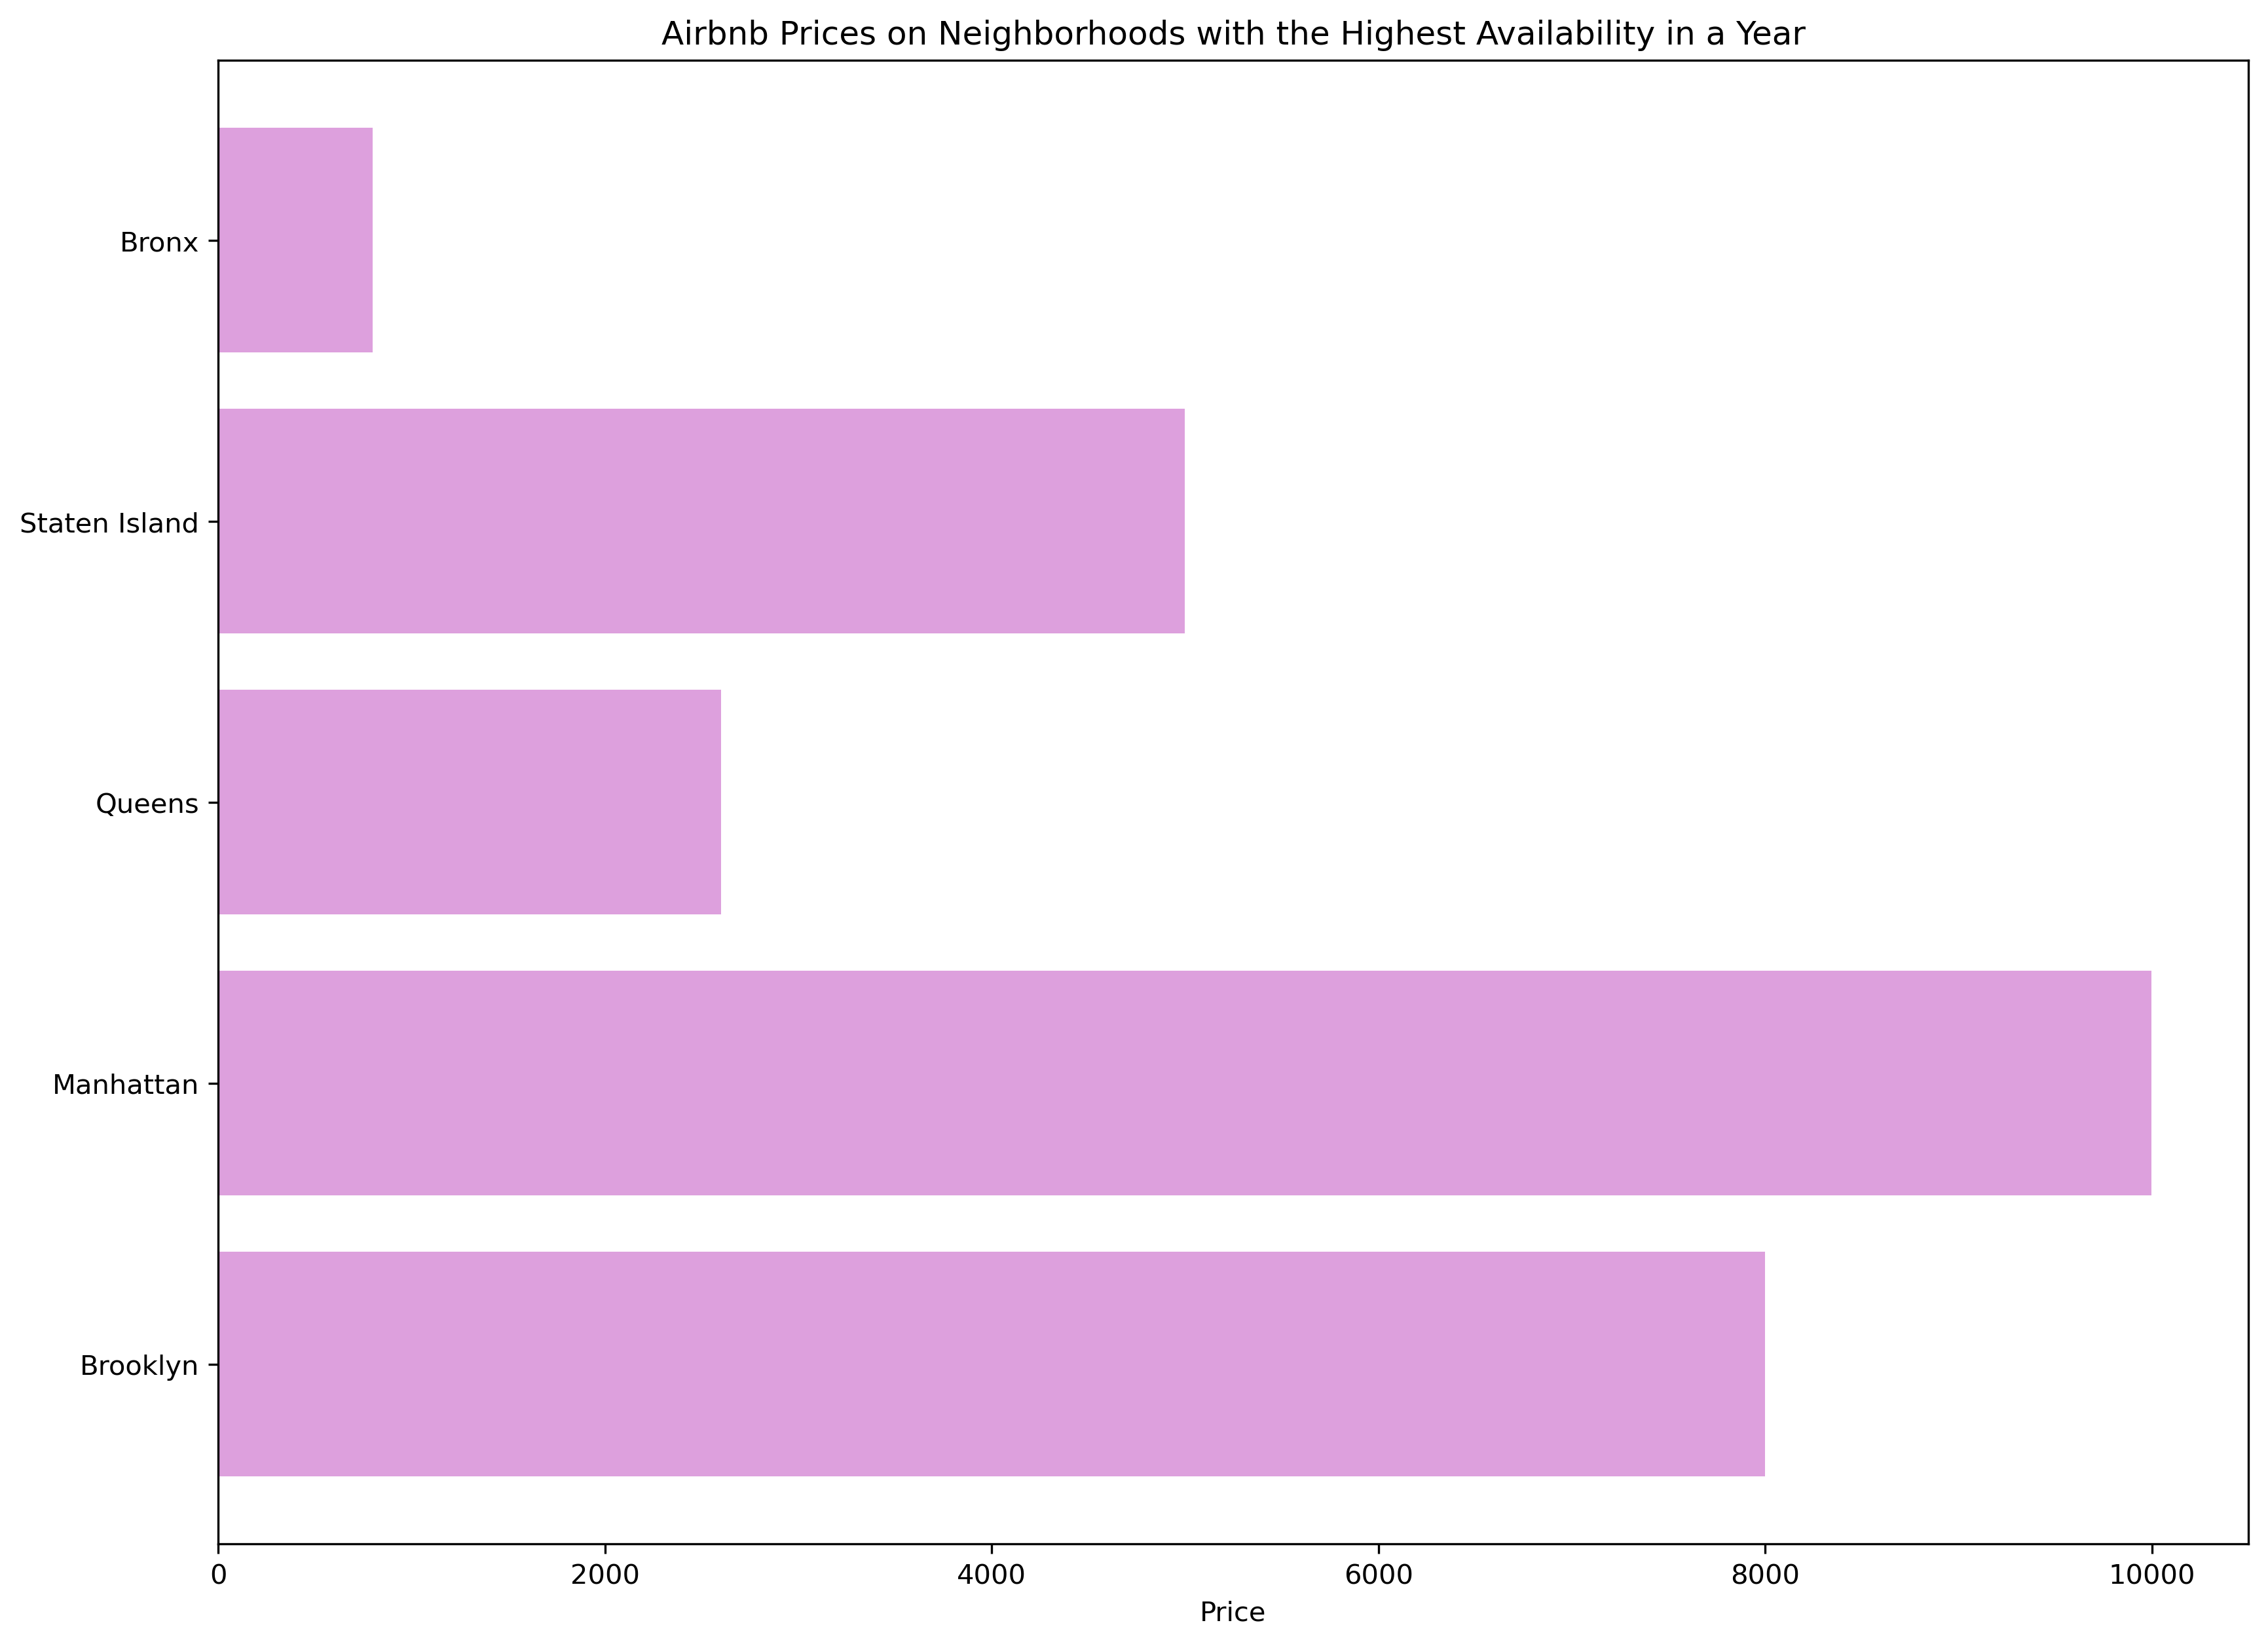

In [11]:
figure_1 = plt.figure(figsize=(20 / 1.5, 15 / 1.5), dpi=300)
Highest_availability = data[data["availability_365"] >= 250]
plt.barh(
    Highest_availability["neighbourhood_group"],
    Highest_availability["price"],
    color="plum",
)
plt.title("Airbnb Prices on Neighborhoods with the Highest Availability in a Year")
plt.xlabel("Price")
plt.show()

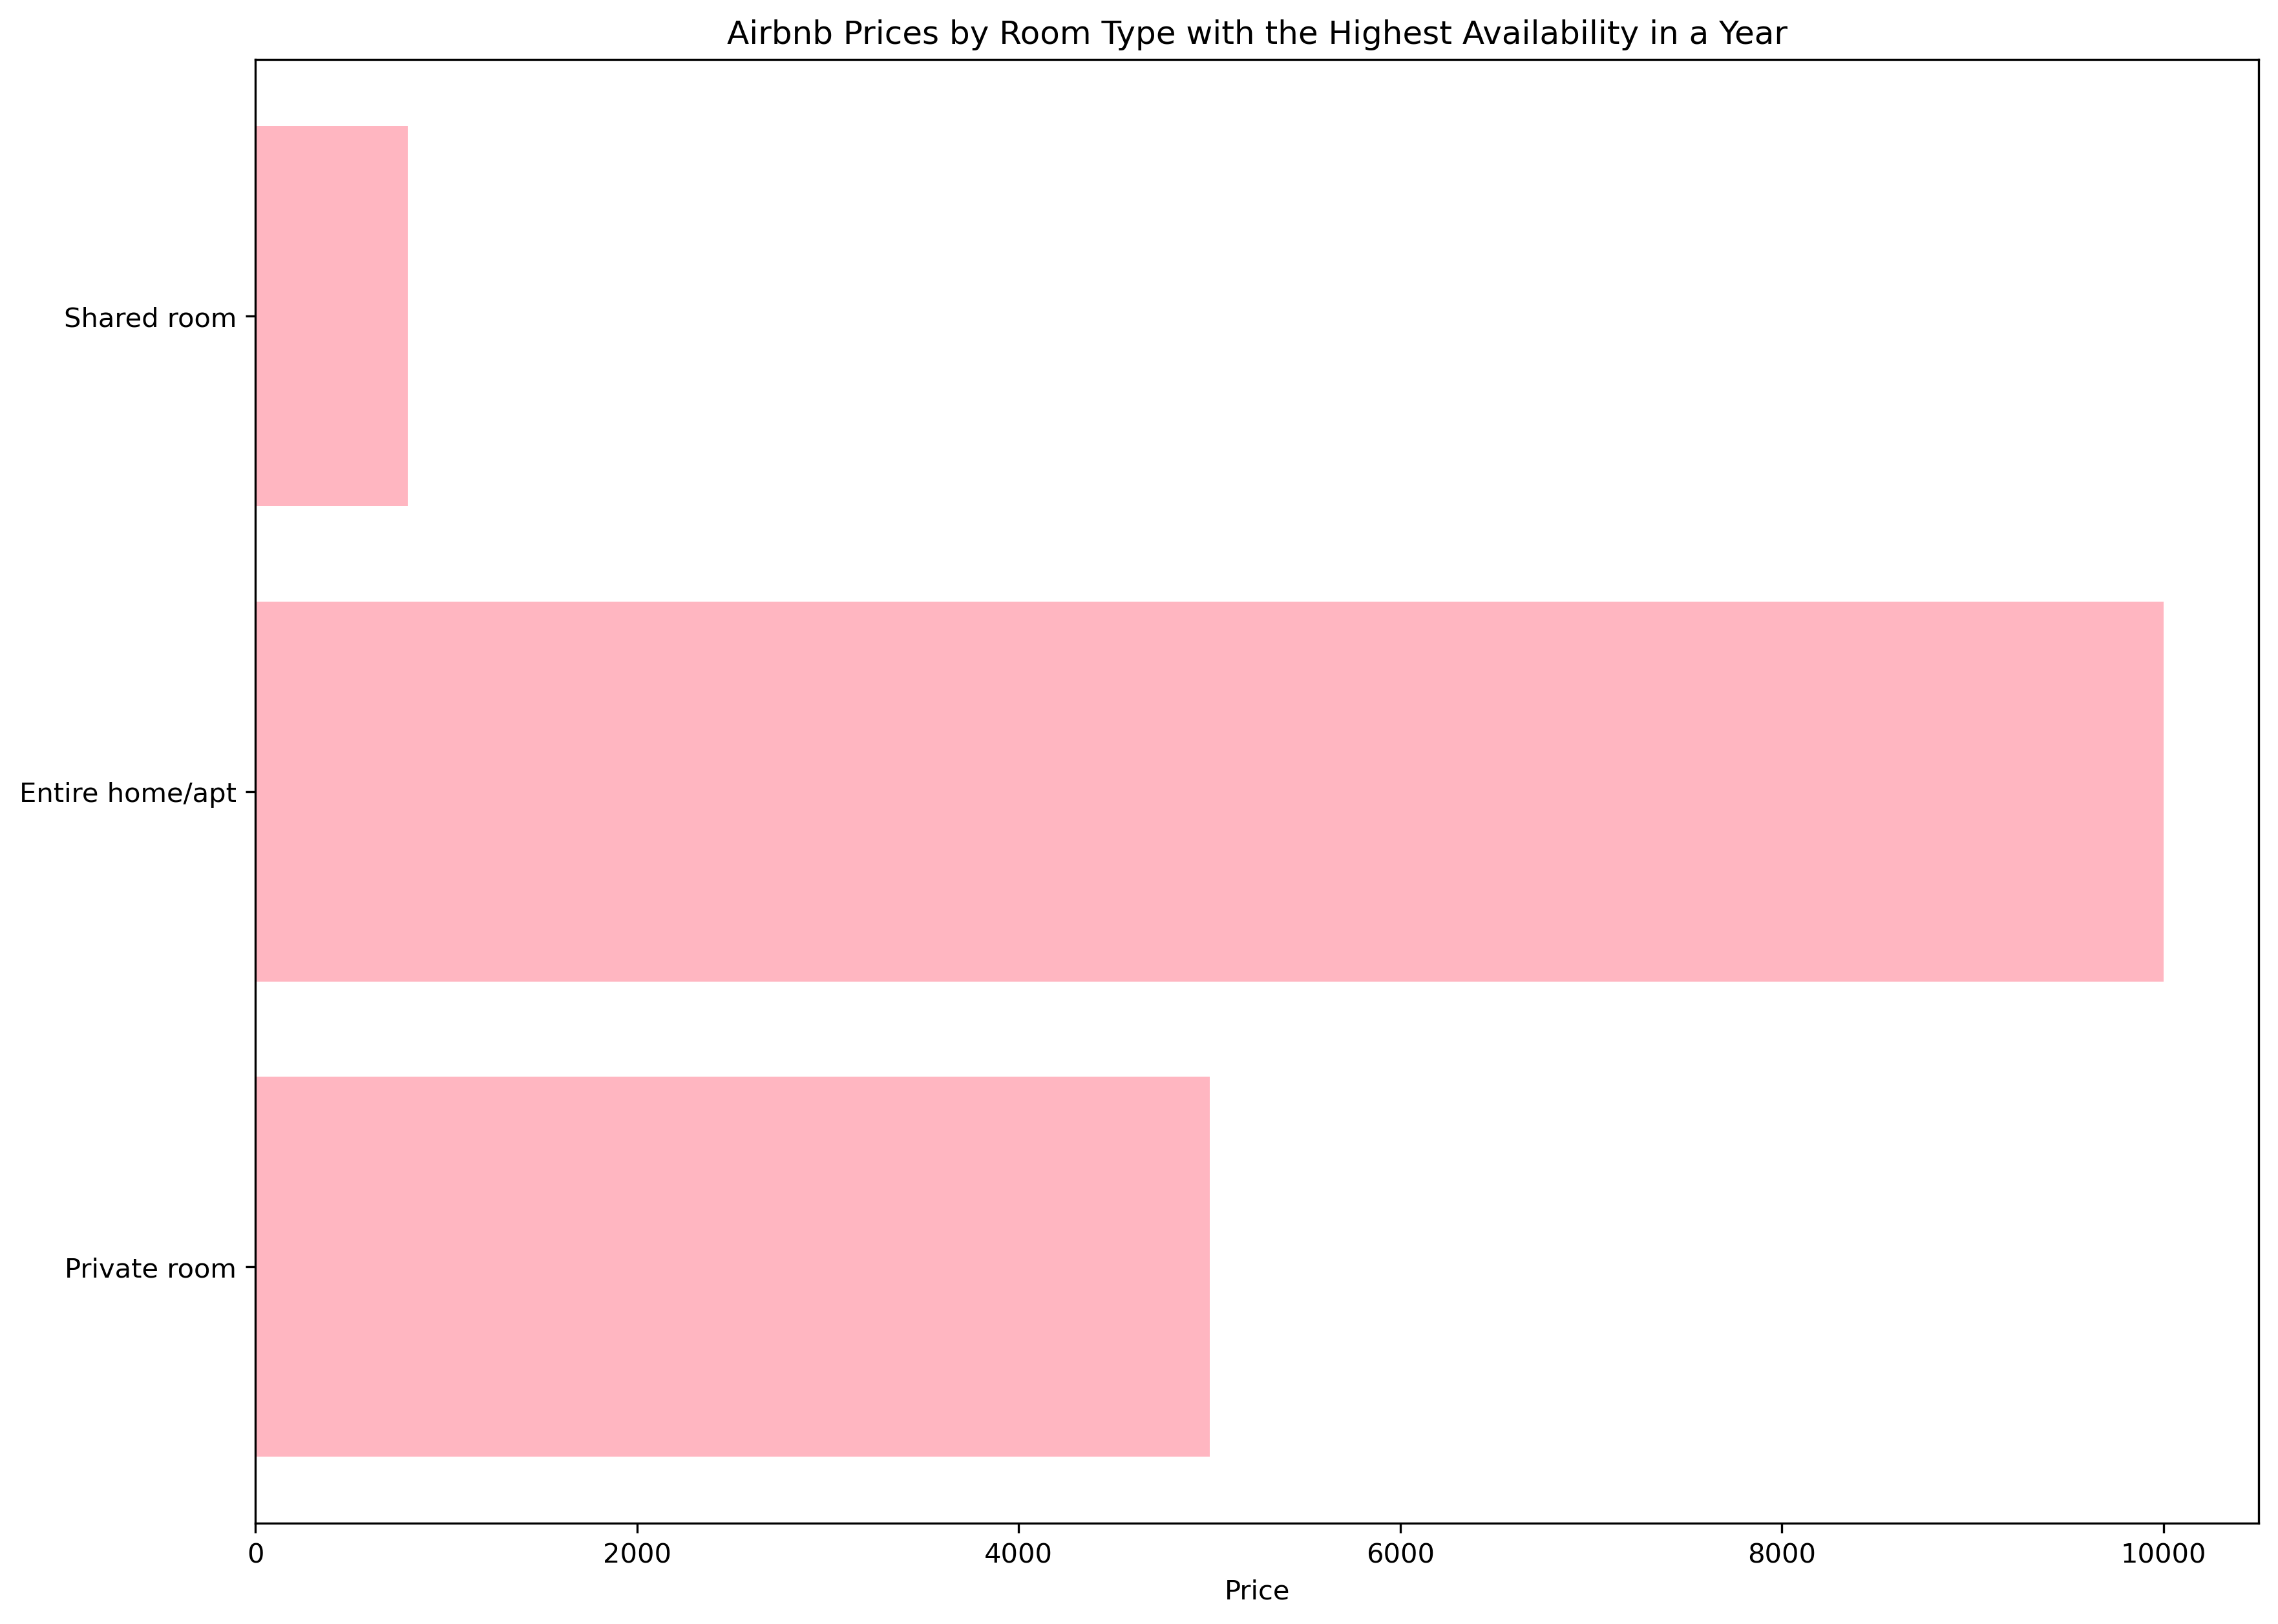

In [12]:
figure_2 = plt.figure(figsize=(20 / 1.5, 15 / 1.5), dpi=300)
Highest_availability = data[data["availability_365"] >= 250]
plt.barh(
    Highest_availability["room_type"], Highest_availability["price"], color="lightpink"
)
plt.title("Airbnb Prices by Room Type with the Highest Availability in a Year")
plt.xlabel("Price")
plt.show()

In [16]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.253252,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.255046,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.009115,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.131599,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.022373,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.091942,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.530093,-0.072376,0.172028
reviews_per_month,0.253252,0.255046,-0.009115,0.131599,-0.022373,-0.091942,0.530093,1.000000,-0.006701,0.162980
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.006701,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.162980,0.225701,1.000000


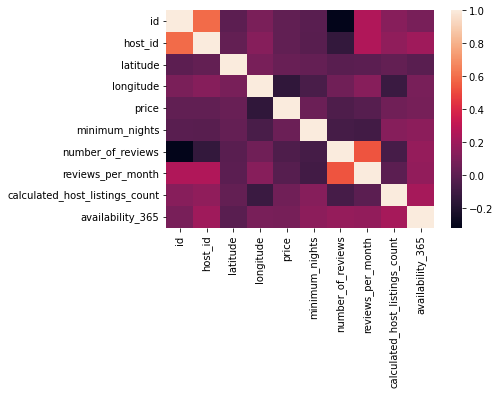

In [27]:
# A heatmap to find any potential correlation among variables
heatmap = sns.heatmap(data.corr())

# The values that are positively correlated are mapped to the lighter shade, whereas the values that are negatively correlated are mapped to the darker shade.

Text(0.5, 0, 'Neighbourhood Group')

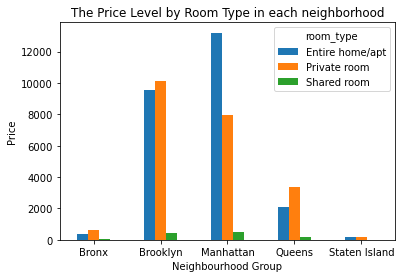

In [62]:
neighborhood_counts = (
    data.groupby(["neighbourhood_group", "room_type"])["neighbourhood_group"]
    .size()
    .unstack(fill_value=0)
)
room_type = neighborhood_counts.plot.bar(rot=0)
plt.title("The Price Level by Room Type in each neighborhood")
plt.ylabel("Price")
plt.xlabel("Neighbourhood Group")

In [32]:
# Save plots to artifacts
Highest_availability = figure_1.get_figure()
Highest_availability.savefig("../artifacts/Highest_availability.png")
Lowest_availability = figure_2.get_figure()
Lowest_availability.savefig("../artifacts/Lowest_availability.png")
heatmap = heatmap.get_figure()
heatmap.savefig("../artifacts/heatmap.png")
room_type = room_type.get_figure()
room_type.savefig("../artifacts/room_type.png")

In [40]:
#Top 10 neighbourhoods by calculated host listing count

neighborhood_top10 = (
    data.groupby(["neighbourhood"])["calculated_host_listings_count"]
    .count()
    .to_frame()
    .sort_values(["calculated_host_listings_count"], ascending=[False])
    .head(10)
)
neighborhood_top10

,calculated_host_listings_count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


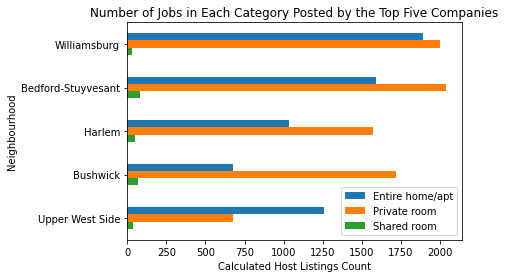

In [59]:
neighborhood_top5 = neighborhood_top10.head(5)
neighborhood_top5_2 = (
    data.groupby(["neighbourhood", "room_type"])["room_type"]
    .size()
    .unstack(fill_value=20)
)
neighborhood_top5_count = pd.merge(
    neighborhood_top5, neighborhood_top5_2, how="left", on=["neighbourhood"]
)
neighborhood_top5_count = neighborhood_top5_count[
    ["Entire home/apt", "Private room", "Shared room"]
]
neighborhood_top5_count.plot(kind="barh")
plt.title("Top 5 Neighbourhoods by Calculated Host Listings based on Room Type")
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Neighbourhood")
ax = plt.gca()
ax.invert_yaxis()